In [1]:
# 📦 Step 1: Import libraries

import pandas as pd  
# For working with tabular data using DataFrames (e.g., reading CSVs, handling columns)

import numpy as np  
# Provides support for large, multi-dimensional arrays and matrices, and mathematical operations

import matplotlib.pyplot as plt  
# A core plotting library used to create static, animated, and interactive visualizations

import seaborn as sns  
# A statistical data visualization library built on top of matplotlib; helps create beautiful plots

import re  
# Regular expression operations used for text preprocessing (e.g., removing special characters or patterns)

import string  
# Provides string constants and functions, useful for removing punctuation

# Import scikit-learn modules for text processing and clustering
from sklearn.feature_extraction.text import TfidfVectorizer  
# Converts a collection of raw text documents into TF-IDF feature vectors

from sklearn.cluster import KMeans  
# A machine learning algorithm used for clustering data into groups

from sklearn.decomposition import PCA  
# Principal Component Analysis, used to reduce data dimensionality for visualization or efficiency

from sklearn.metrics import silhouette_score  
# A metric to evaluate clustering quality by measuring how well each point fits into its cluster

# Natural Language Toolkit (NLTK) for working with human language data
import nltk  
# A popular NLP library used for tasks like tokenization, stopwords, stemming, etc.

from nltk.corpus import stopwords  
# A predefined list of common stopwords (e.g., "the", "is", "and") that are usually removed in NLP

nltk.download('stopwords')  
# Downloads the stopwords corpus the first time you use it


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# 📂 Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv')

In [3]:
# Optional: View data types
print(df.dtypes)

test_id       int64
question1    object
question2    object
dtype: object


In [4]:
df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [5]:
print(df[["question1", "question2"]])

                                                 question1  \
0        How does the Surface Pro himself 4 compare wit...   
1        Should I have a hair transplant at age 24? How...   
2        What but is the best way to send money from Ch...   
3                              Which food not emulsifiers?   
4                         How "aberystwyth" start reading?   
...                                                    ...   
2345791  How do Peaks (TV series): Why did Leland kill ...   
2345792  What does be "in transit" mean on FedEx tracking?   
2345793  What are some famous Romanian drinks (alcoholi...   
2345794  What were the best and worst things about publ...   
2345795  What is the best medication equation erectile ...   

                                                 question2  
0        Why did Microsoft choose core m3 and not core ...  
1              How much cost does hair transplant require?  
2                            What you send money to China?  
3          

In [6]:
df = df.dropna(subset=['question1', 'question2'])  # Remove rows with missing values

In [7]:
df = df.head(10000)  # For performance (optional)

In [8]:
# 🔍 Step 3: Text cleaning function

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

In [9]:
# Apply cleaning
df['q1_clean'] = df['question1'].apply(clean_text)
df['q2_clean'] = df['question2'].apply(clean_text)

In [10]:
# ✏️ Step 4: Combine question1 and question2 into one corpus for clustering
combined_questions = pd.concat([df['q1_clean'], df['q2_clean']], ignore_index=True)

In [11]:
# 🧮 Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(combined_questions)

In [12]:
# 🤖 Step 6: Apply K-Means Clustering

# Try different values for k
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Assign cluster labels
labels = kmeans.labels_

# Add to dataframe
clustered_df = pd.DataFrame({'question': combined_questions, 'cluster': labels})

In [13]:
# 📊 Step 7: Analyze cluster contents
for i in range(k):
    print(f"\n📌 Cluster {i} sample questions:")
    print(clustered_df[clustered_df['cluster'] == i]['question'].head(3).to_string(index=False))



📌 Cluster 0 sample questions:
              best books time
   best slideshow app android
whats best thing breakup done

📌 Cluster 1 sample questions:
         first computer table language learn
                         first time sex feel
amazon carrierdelivery man know whats inside

📌 Cluster 2 sample questions:
        possible xat percentile
   way possible one time travel
examples closed source software

📌 Cluster 3 sample questions:
us education system cannot conducted indiaor po...
    discontinuing rupee notes help curb much india
                 conducted india become superpower

📌 Cluster 4 sample questions:
               people like hrithik roshan tax much
good ways network people diverse backgrounds de...
people love watch game thrones isnt incestpolitics

📌 Cluster 5 sample questions:
       surface pro compare ipad pro
hair transplant age much would cost
                   food emulsifiers

📌 Cluster 6 sample questions:
                 batman get kill batman v superm

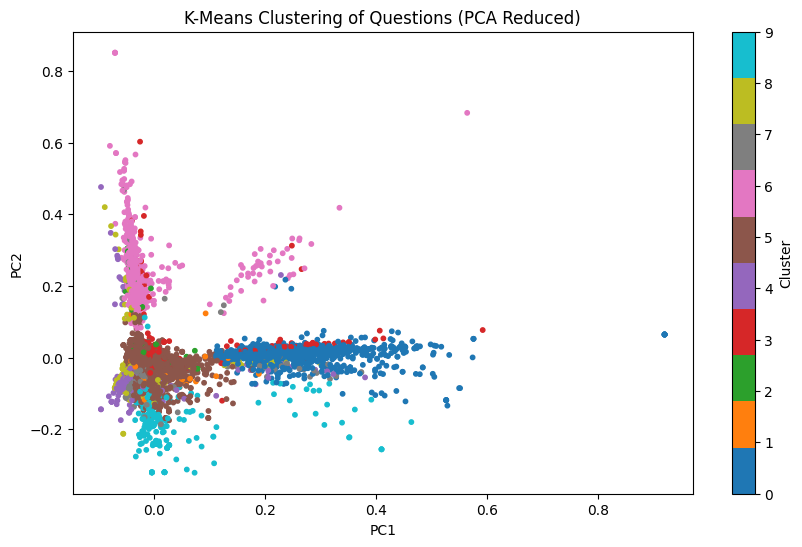

In [14]:
# 🧪 Step 8 (Optional): Visualize with PCA (2D)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='tab10', s=10)
plt.title("K-Means Clustering of Questions (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [15]:
# 📈 Step 9: Evaluate clustering with Silhouette Score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.013617735323172571
